In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score
import sys
import os

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

In [3]:
sm = StructureModel()

In [4]:
data = pd.read_csv('../test_tables/BD_Demographics_Database_BSI_WhoQol.csv', sep = ',',encoding='latin-1')

In [5]:
new_feat = []#list(data.columns)[42:141]
new_feat += ['BSI_23','BSI_36','BSI_20','BSI_17','BSI_38','BSI_46','BSI_31','BSI_10','BSI_53',
             'WHOQoL_6','WHOQoL_17','WHOQoL_18','WHOQoL_19','WHOQoL_20','WHOQoL_21','WHOQoL_13',
            'WHOQoL_23','WHOQoL_24','WHOQoL_12','WHOQoL_26']

In [6]:
result_cols = []
for col in data.columns:
    if 'whoqol' in col:
        result_cols.append(col)
    elif 'BSI_' in col and len(col)>6:
        result_cols.append(col)
bsi = []
whoqol = []
for col in data.columns:
    if 'WQOL' in col:
        whoqol.append(col)
    elif 'BSI_' in col and len(col)>6:
        bsi.append(col)
        
bsi_feat = []
whoqol_feat = []
for col in data.columns:
    if 'WHOQoL' in col:
        whoqol_feat.append(col)
    elif 'BSI_' in col and len(col)<=6:
        bsi_feat.append(col)

In [7]:

data[result_cols] = data[result_cols].replace(' ', np.nan)
data = data.replace(' ', np.nan)

In [8]:
#data.drop(['ID_covid', 'sample', 'date_created','consent', 'sgID', 'date_birth', 'region','city_br','Occupation_other', 'working_hours','religion_other', 'cceb_class',
#'social_support_n_family','social_support_n_friends'],axis = 1, inplace = True)

In [9]:
#data[bsi] = data[bsi].apply(lambda x: x.str.replace(',','.'))
#data[whoqol] = data[whoqol].apply(lambda x: x.str.replace(',','.'))

In [10]:
data[bsi_feat] = data[bsi_feat].astype(float)

data[whoqol_feat] = data[whoqol_feat].astype(float)

In [11]:
for col in data.columns:
    try:
        data[col] = data[col].astype(float)
    except:
        (print(col))

database
sex
education
marital_status
ethnicity
cceb_class


In [12]:
data.columns

Index(['database', 'sex', 'age_months', 'age_years', 'education',
       'marital_status', 'ethnicity', 'cceb_class', 'BSI_1', 'BSI_2', 'BSI_3',
       'BSI_4', 'BSI_5', 'BSI_6', 'BSI_7', 'BSI_8', 'BSI_9', 'BSI_10',
       'BSI_11', 'BSI_12', 'BSI_13', 'BSI_14', 'BSI_15', 'BSI_16', 'BSI_17',
       'BSI_18', 'BSI_19', 'BSI_20', 'BSI_21', 'BSI_22', 'BSI_23', 'BSI_24',
       'BSI_25', 'BSI_26', 'BSI_27', 'BSI_28', 'BSI_29', 'BSI_30', 'BSI_31',
       'BSI_32', 'BSI_33', 'BSI_34', 'BSI_35', 'BSI_36', 'BSI_37', 'BSI_38',
       'BSI_39', 'BSI_40', 'BSI_41', 'BSI_42', 'BSI_43', 'BSI_44', 'BSI_45',
       'BSI_46', 'BSI_47', 'BSI_48', 'BSI_49', 'BSI_50', 'BSI_51', 'BSI_52',
       'BSI_53', 'WHOQoL_1', 'WHOQoL_2', 'WHOQoL_3', 'WHOQoL_4', 'WHOQoL_5',
       'WHOQoL_6', 'WHOQoL_7', 'WHOQoL_8', 'WHOQoL_9', 'WHOQoL_10',
       'WHOQoL_11', 'WHOQoL_12', 'WHOQoL_14', 'WHOQoL_15', 'WHOQoL_16',
       'WHOQoL_17', 'WHOQoL_18', 'WHOQoL_19', 'WHOQoL_20', 'WHOQoL_21',
       'WHOQoL_22', 'WHOQoL_23', 

In [13]:
for col in data.columns:
    if data[col].nunique()==1:
        data.drop(col,inplace = True,axis=1)

In [14]:
data.fillna(-1, inplace = True)
#Y1 = data['BSI_GSI_EB']
#Y2 = data[whoqol]
#data['mean'] = np.round(data['mean']/10)

#Y2 = data['"ARTERIAL_DIAS"']
#data.drop(whoqol + bsi ,axis = 1, inplace = True)
X = data[whoqol_feat+  bsi + whoqol + bsi_feat]
#X2 = data[new_feat]

In [3]:
X = pd.read_csv('../test_tables/covid_reduced_WQOLPsicologico_full.csv')

In [16]:
X.corr()['WQOL.Psicologico']

WHOQoL_1            0.910007
WHOQoL_2            0.898094
WHOQoL_3            0.639199
WHOQoL_4            0.617772
WHOQoL_5            0.937387
WHOQoL_6            0.949248
WHOQoL_7            0.943847
WHOQoL_8            0.916584
WHOQoL_9            0.889510
WHOQoL_10           0.935483
WHOQoL_11           0.935505
WHOQoL_12           0.858448
WHOQoL_14           0.871347
WHOQoL_15           0.897983
WHOQoL_16           0.871043
WHOQoL_17           0.926087
WHOQoL_18           0.906098
WHOQoL_19           0.953763
WHOQoL_20           0.922778
WHOQoL_21           0.855546
WHOQoL_22           0.905684
WHOQoL_23           0.887169
WHOQoL_24           0.840512
WHOQoL_25           0.838265
WHOQoL_26           0.584970
WQOL.Psicologico    1.000000
Name: WQOL.Psicologico, dtype: float64

In [17]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import matplotlib.pyplot as plt
import networkx as nx


In [18]:
sm = from_pandas(X, w_threshold = 0.05, max_iter = 10, tabu_parent_nodes= ['WQOL.Psicologico'],
                 
                )

In [19]:
#sm = sm1.copy()

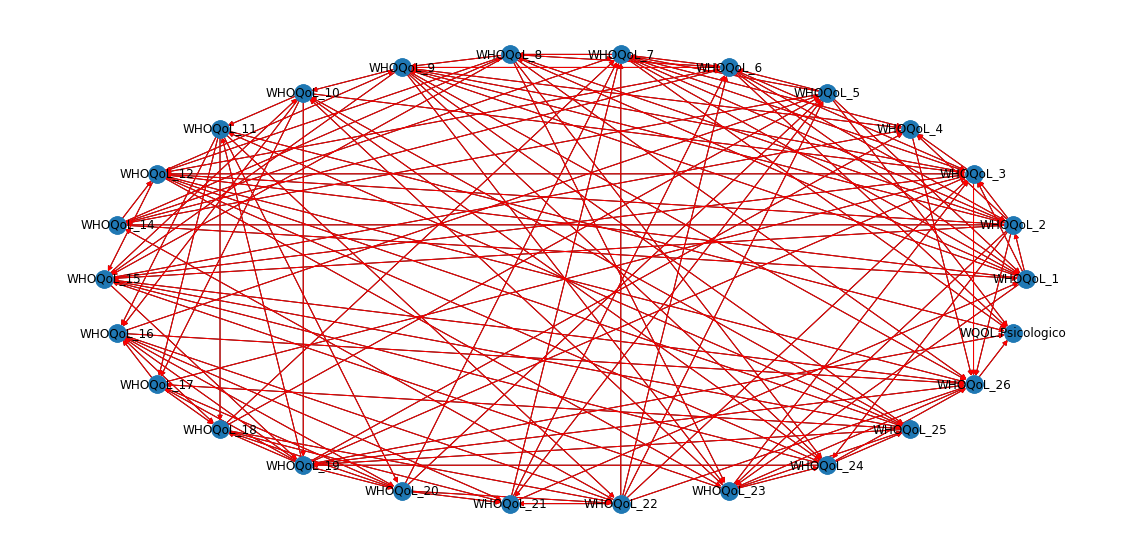

In [20]:
#sm.remove_edges_below_threshold(0.15)
#sm1 = sm.get_largest_subgraph()
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_circular(sm, ax=ax)

pos = nx.circular_layout(sm)

nx.draw_networkx_nodes(sm, pos)
nx.draw_networkx_labels(sm, pos)
nx.draw_networkx_edges(sm, pos,  edge_color='r', arrows=True)
fig.show()

In [21]:
vec = []
for edge in sm.edges:
    if (edge[1])=='BSI_GSI' :
        vec.append(edge[0])
    if (edge[0])=='BSI_GSI':
        vec.append(edge[1])

In [22]:
len(set(vec))

0

In [23]:
vec

[]

In [31]:
vec = []

feata = 'WHOQoL_11'
for edge in sm.edges:
    if (edge[1])== feata:
        vec.append(edge[0])
    #if (edge[0])==feata:
    #    vec.append(edge[1])
(set(vec))  

{'WHOQoL_10', 'WHOQoL_19', 'WHOQoL_25'}

In [25]:
{'WHOQoL_3', 'WHOQoL_4', 'WHOQoL_10', 'WHOQoL_15', 'WHOQoL_16', 'WHOQoL_17','WHOQoL_18'}

{'WHOQoL_10',
 'WHOQoL_15',
 'WHOQoL_16',
 'WHOQoL_17',
 'WHOQoL_18',
 'WHOQoL_3',
 'WHOQoL_4'}

In [26]:
{'WHOQoL_11', '', 'WHOQoL_26', 'WHOQoL_5', '', 'WHOQoL_7'}

{'', 'WHOQoL_11', 'WHOQoL_26', 'WHOQoL_5', 'WHOQoL_7'}

In [27]:
feata = 'BSI_Somatization_EB'
for edge in sm.edges:
    if (edge[1])== feata:
        vec.append(edge[0])
    if (edge[0])==feata:
        vec.append(edge[1])
(set(vec))

set()